## 텍스트 마이닝
- 토큰화
글자, 단어, N-gram, 형태소 분석(Konlpy)
- 수치화
원핫인코딩, BOW(bag of words), Word2Vec

In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data() # 뉴스 기사 텍스트 데이터

C:\Users\SMT002\anaconda3\envs\deep01\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\SMT002\anaconda3\envs\deep01\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8982,)
(2246,)
(8982,)
(2246,)


In [4]:
print(len(X_train[0]))  # 0번째 뉴스기사
print(len(X_train[1]))  # 1번째 뉴스기사
# 뉴스기사마다 모두 텍스트의 길이가 다르다 --> 텍스트 길이(time step)을 맞춰주어야 한다!

87
56


In [5]:
X_train[0] # 단어별 빈도수 랭킹

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
word_dic = reuters.get_word_index() # 단어별 빈도 순위

In [7]:
word_dic['the'] # 'the' 가 빈도수 1위 

1

In [8]:
[len(i) for i in X_train] # 각 i번째 뉴스기사의 길이를 출력

[87,
 56,
 139,
 224,
 101,
 116,
 100,
 100,
 82,
 106,
 31,
 59,
 65,
 316,
 527,
 76,
 114,
 17,
 91,
 77,
 231,
 108,
 83,
 29,
 95,
 110,
 23,
 373,
 114,
 354,
 133,
 222,
 571,
 155,
 83,
 208,
 170,
 269,
 74,
 19,
 23,
 78,
 21,
 377,
 104,
 299,
 89,
 56,
 94,
 139,
 118,
 36,
 137,
 107,
 83,
 66,
 70,
 112,
 88,
 51,
 83,
 123,
 17,
 185,
 84,
 52,
 102,
 73,
 106,
 486,
 107,
 82,
 263,
 172,
 491,
 190,
 143,
 62,
 26,
 88,
 114,
 38,
 85,
 112,
 793,
 104,
 25,
 21,
 101,
 28,
 25,
 81,
 135,
 73,
 62,
 18,
 90,
 266,
 91,
 64,
 409,
 92,
 319,
 166,
 85,
 200,
 152,
 474,
 60,
 58,
 584,
 71,
 273,
 51,
 255,
 28,
 171,
 143,
 91,
 46,
 110,
 77,
 162,
 24,
 52,
 175,
 61,
 95,
 97,
 259,
 112,
 73,
 94,
 17,
 650,
 23,
 88,
 309,
 105,
 89,
 41,
 314,
 54,
 374,
 67,
 160,
 75,
 207,
 373,
 84,
 87,
 74,
 98,
 136,
 256,
 95,
 50,
 108,
 52,
 100,
 233,
 86,
 68,
 47,
 73,
 158,
 113,
 23,
 100,
 80,
 202,
 104,
 122,
 101,
 95,
 118,
 253,
 192,
 80,
 183,
 29,
 604,


In [9]:
# 최대 길이
max([len(i) for i in X_train])

2376

In [10]:
# 최소 길이
min([len(i) for i in X_train])

13

In [11]:
# 평균 길이
np.mean([len(i) for i in X_train])

145.5398574927633

In [12]:
# 중앙값
np.median([len(i) for i in X_train])

95.0

### 100개 단어를 보고 예측하도록 설정하기

In [13]:
from tensorflow.keras.preprocessing import sequence

In [14]:
X_train = sequence.pad_sequences(X_train, maxlen = 100)   # time step = 100

In [15]:
X_train.shape

(8982, 100)

In [16]:
X_train[512]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1, 486, 341,  83,  19,  32,  26,  14,  83,  19,  32,  26,
       255, 219, 429,  68, 146, 252,  83,  17,  12])

In [17]:
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [18]:
X_test.shape

(2246, 100)

In [19]:
X_train = X_train.reshape(8982, 100, 1)     # X_train.shape[0] = 8982
X_test = X_test.reshape(X_test.shape[0], 100, 1)     # X_test.shape[0] = 2246

### 정답 데이터

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
np.unique(y_train)  

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [22]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [23]:
y_train_one_hot.shape, y_test_one_hot.shape

((8982, 46), (2246, 46))

In [24]:
print(y_train_one_hot[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Modeling

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, LSTM

In [26]:
model = Sequential()

model.add(SimpleRNN(32, input_shape = (100, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2990      
Total params: 6,190
Trainable params: 6,190
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train_one_hot, epochs= 20, 
                   validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/20
6287/6287 [==============================] - 7s 1ms/sample - loss: 2.6543 - accuracy: 0.3245 - val_loss: 2.3879 - val_accuracy: 0.3532
Epoch 2/20
6287/6287 [==============================] - 6s 964us/sample - loss: 2.4225 - accuracy: 0.3510 - val_loss: 2.3952 - val_accuracy: 0.3532
Epoch 3/20
6287/6287 [==============================] - 6s 954us/sample - loss: 2.4179 - accuracy: 0.3510 - val_loss: 2.3758 - val_accuracy: 0.3532
Epoch 4/20
6287/6287 [==============================] - 6s 969us/sample - loss: 2.3988 - accuracy: 0.3520 - val_loss: 2.3462 - val_accuracy: 0.3633
Epoch 5/20
6287/6287 [==============================] - 6s 973us/sample - loss: 2.3815 - accuracy: 0.3612 - val_loss: 2.3371 - val_accuracy: 0.3640
Epoch 6/20
6287/6287 [==============================] - 6s 970us/sample - loss: 2.3711 - accuracy: 0.3549 - val_loss: 2.3319 - val_accuracy: 0.3636
Epoch 7/20
6287/6287 [==============================] - 6s 992us/s

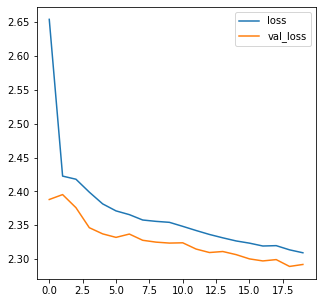

In [32]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

### LSTM ( Long Short Term Memory )
- 기억을 관리해주는 기능 추가된 RNN 층

In [42]:
model2 = Sequential()
model2.add(LSTM(32, input_shape= (100, 1), return_sequences=True))      # return_sequences : RNN 층을 더 쌓고 싶을 때
model2.add(Dropout(0.3))
model2.add(LSTM(32, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(32))

model2.add(Dense(64, activation='relu'))
model2.add(Dense(46, activation='softmax'))

In [43]:
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [44]:
history2 = model2.fit(X_train,y_train_one_hot, epochs= 20, 
                   validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/20
6287/6287 [==============================] - 7s 1ms/sample - loss: 2.5131 - accuracy: 0.3599 - val_loss: 2.1617 - val_accuracy: 0.4393
Epoch 2/20
6287/6287 [==============================] - 3s 441us/sample - loss: 2.1940 - accuracy: 0.4385 - val_loss: 2.0965 - val_accuracy: 0.4616
Epoch 3/20
6287/6287 [==============================] - 3s 447us/sample - loss: 2.1235 - accuracy: 0.4629 - val_loss: 2.0777 - val_accuracy: 0.4790
Epoch 4/20
6287/6287 [==============================] - 3s 440us/sample - loss: 2.1026 - accuracy: 0.4686 - val_loss: 2.0670 - val_accuracy: 0.4675
Epoch 5/20
6287/6287 [==============================] - 3s 441us/sample - loss: 2.0814 - accuracy: 0.4703 - val_loss: 2.0591 - val_accuracy: 0.4686
Epoch 6/20
6287/6287 [==============================] - 3s 441us/sample - loss: 2.0595 - accuracy: 0.4730 - val_loss: 2.0409 - val_accuracy: 0.4831
Epoch 7/20
6287/6287 [==============================] - 3s 453us/s

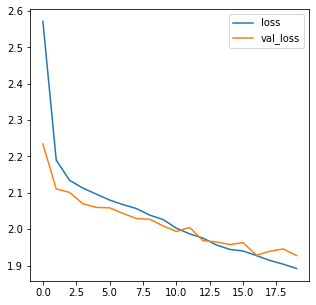

In [38]:
plt.figure(figsize=(5,5))
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()